In [1]:
# importing pandas library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading passengers dataset
df = pd.read_csv('../datasets/air_passenger.csv')
df.head(13) # showing last 13 samples

,date,passengers
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121
5,1949-06-30,135
6,1949-07-31,148
7,1949-08-31,148
8,1949-09-30,136
9,1949-10-31,119


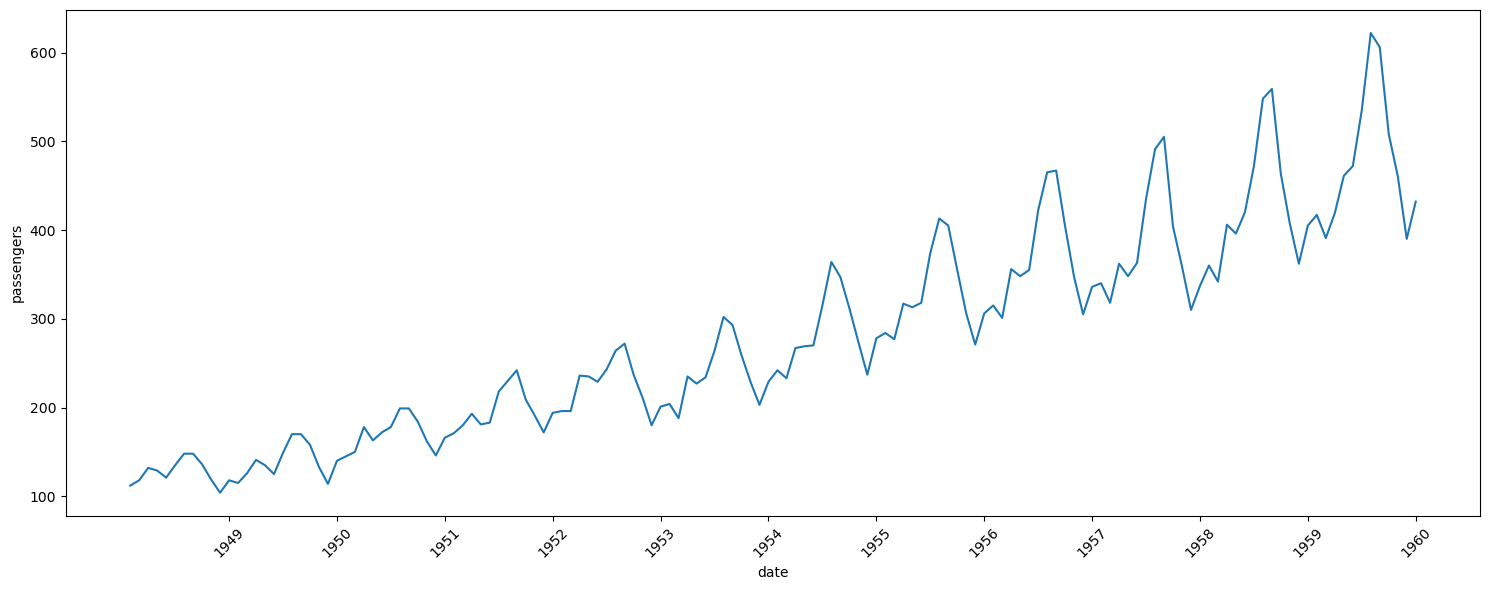

In [3]:
plt.figure(figsize=(15, 6))

sns.lineplot(data=df, x='date', y='passengers')

years = pd.to_datetime(df['date']).dt.year.unique()
ticks = [f"{year}-12-31" for year in years]

plt.xticks(ticks=ticks, labels=years, rotation=45)
plt.tight_layout()

In [4]:
train = df[: -12] # using all except last 12 samples for training
test = df[-12: ] # reserving last 12 samples for testing 

In [5]:
train

,date,passengers
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121
...,...,...
127,1959-08-31,559
128,1959-09-30,463
129,1959-10-31,407
130,1959-11-30,362


In [6]:
test

,date,passengers
132,1960-01-31,417
133,1960-02-29,391
134,1960-03-31,419
135,1960-04-30,461
136,1960-05-31,472
137,1960-06-30,535
138,1960-07-31,622
139,1960-08-31,606
140,1960-09-30,508
141,1960-10-31,461


In [7]:
# implementing historial mean baseline model
# baseline will be used to evaluate more complex models

baseline = train[-12: ] # number of passengers in 1959
baseline

,date,passengers
120,1959-01-31,360
121,1959-02-28,342
122,1959-03-31,406
123,1959-04-30,396
124,1959-05-31,420
125,1959-06-30,472
126,1959-07-31,548
127,1959-08-31,559
128,1959-09-30,463
129,1959-10-31,407


In [8]:
test.loc[:, 'baseline'] = baseline['passengers'].values
test

,date,passengers,baseline
132,1960-01-31,417,360
133,1960-02-29,391,342
134,1960-03-31,419,406
135,1960-04-30,461,396
136,1960-05-31,472,420
137,1960-06-30,535,472
138,1960-07-31,622,548
139,1960-08-31,606,559
140,1960-09-30,508,463
141,1960-10-31,461,407


In [9]:
# MAPE (Mean Absolute Percentage Error) returns the percentage of how much the forecast values
# deviate from the observed or actual values on average, whether the prediction was
# higher or lower than the observed values.

In [10]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [11]:
mape_base = mape(test['passengers'], test['baseline'])
mape_base

9.987532920823485

In [12]:
# this means, our baseline prediction deviates by 10% from the actual value

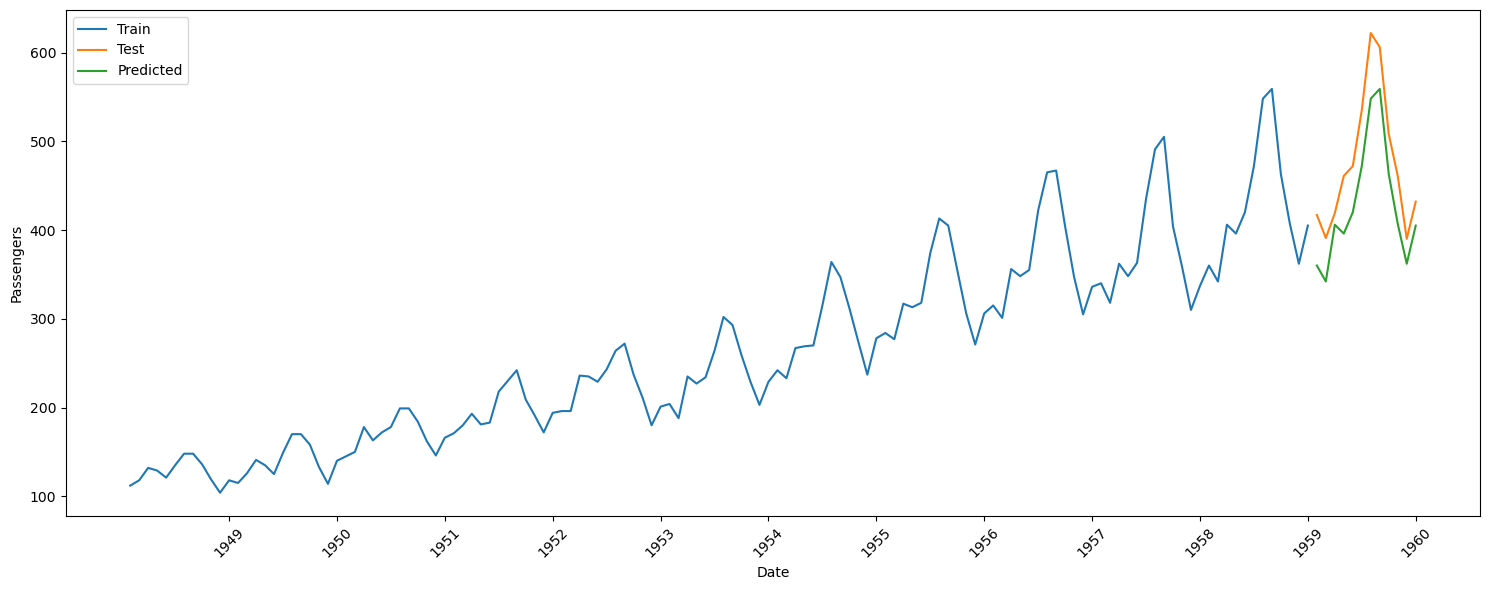

In [13]:
# plotting
plt.figure(figsize=(15, 6))
sns.lineplot(data=train, x='date', y='passengers', label='Train')
sns.lineplot(data=test, x='date', y='passengers', label='Test')
sns.lineplot(data=test, x='date', y='baseline', label='Predicted')

years = pd.to_datetime(df['date']).dt.year.unique()
ticks = [f"{year}-12-31" for year in years]
plt.xticks(ticks=ticks, labels=years, rotation=45)

plt.xlabel('Date')
plt.ylabel('Passengers')
plt.tight_layout()

In [14]:
# In a random_walk process, 
# the present value, yt is a function of the previous value yt-1
# yt = C + yt-1 + et
# where C is a constant and et is a random number(white noise. ie., mean=0, std=1)

# if C = 0 and y0 = 0
# then y1 = e1
# y2 = y1 + e2 = e1 + e2
# therefore , yt = sumation from 1 to t of (et)

In [15]:
# simulating a random walk (1000 steps)

np.random.seed(42)
steps = []
for _ in range(1000):
    steps.append(np.random.normal(loc=0, scale=1)) # mean=loc, std=scale

steps[0]=0 # initializing first step to 0

random_walk = np.cumsum(steps)

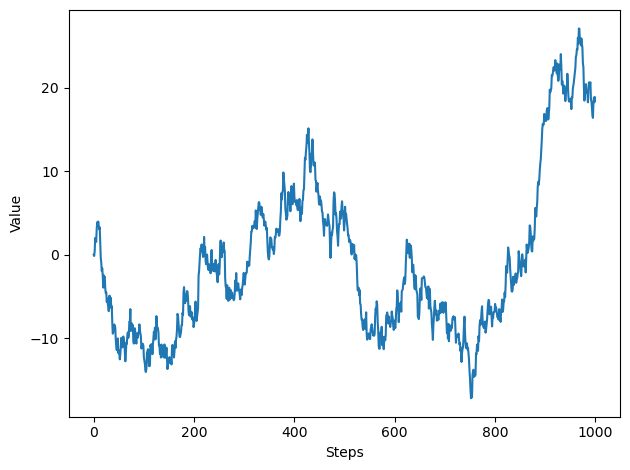

In [16]:
plt.plot(random_walk)
plt.xlabel('Steps')
plt.ylabel('Value')
plt.tight_layout()

In [17]:
# how do we know if our data is a random_walk 
# and if it is how do we transform it?

In [18]:
# a stationary process is a one whose (mean, variance, std, etc.) do not change over time.

# a non stationary process can be transformed to stationary with differencing
# yt' = yt -  yt-1

# and using Augmented Dickey-Fuller (ADF) test for stationarity 
# and Autocorrelation Function (ACF) to test for random_walk

# the p-value from the ADF test < 0.05, then the process if stationary.

In [19]:
# importing ADF
from statsmodels.tsa.stattools import adfuller

adfuller(random_walk)[1] # testing if our random_walk is stationary

0.7654789696692581

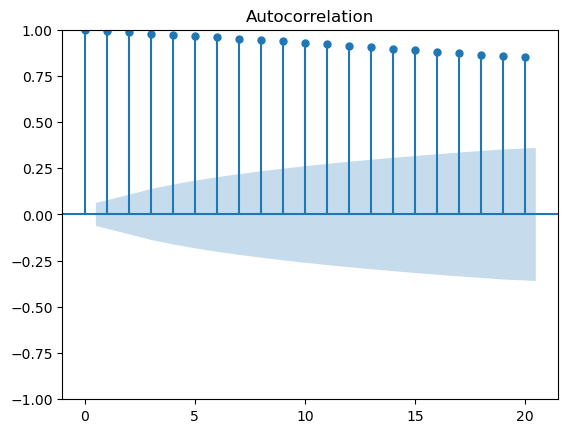

In [20]:
# importing ACF
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(random_walk, lags=20); # lags=steps

In [21]:
# from the graph, autocorrelation decreases with increasing lag, indicating random walk

In [22]:
# transforming our random walk

random_walk_transformed = np.diff(random_walk, n=1) # first-order differencing

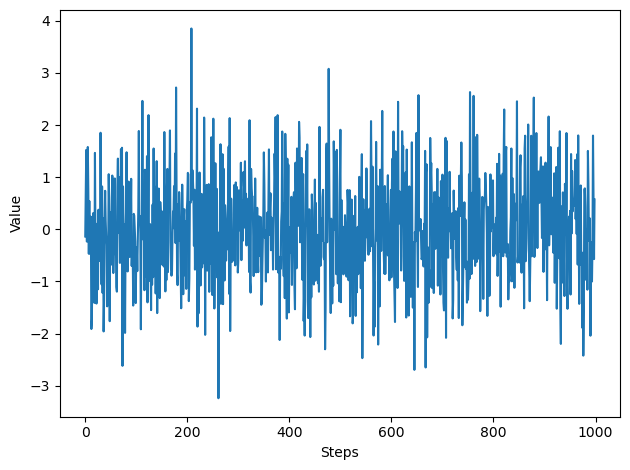

In [23]:
plt.plot(random_walk_transformed)
plt.xlabel('Steps')
plt.ylabel('Value')
plt.tight_layout()

In [24]:
adfuller(random_walk_transformed)[1] # testing stationarity again

0.0

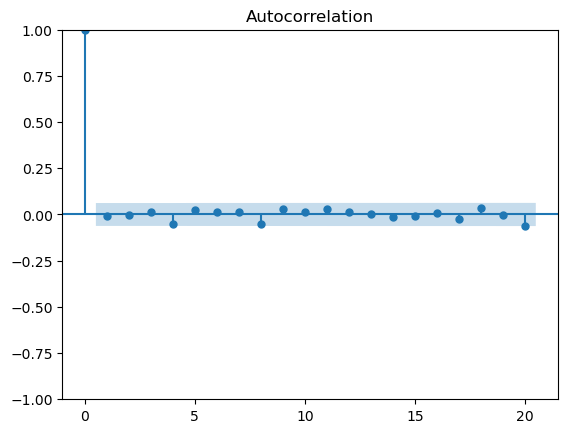

In [25]:
plot_acf(random_walk_transformed, lags=20); # lags=steps

In [26]:
# plot shows that autocorrelation is zero, indicating a random walk

In [27]:
# testing for stationarity on passenger data

adfuller(df['passengers'].values)[1] # passenger data is not stationary

0.9918802434376409

In [28]:
df_transformed = np.diff(df['passengers'].values, n=1) # first-order differencing

In [29]:
adfuller(df_transformed)[1] # not stationary

0.054213290283825294

In [30]:
df_transformed = np.diff(df['passengers'].values, n=2) # second-order differencing

In [31]:
adfuller(df_transformed)[1] # now stationary

2.7328918500143186e-29

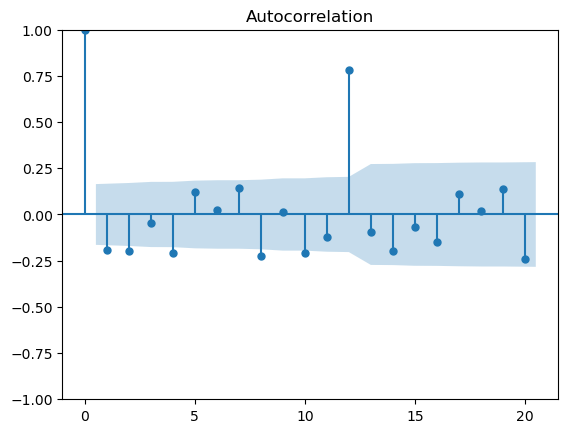

In [32]:
plot_acf(df_transformed, lags=20);

In [33]:
# the above plot shows that the passenger dataset is not a random_walk.
# as there are significant correlations at lags 1, 2, 4, 8, and 12 

In [34]:
# what if our data happens to be a random walk, how will you make predictions?

In [35]:
# with random walk, which has no correlation, we can only forecast the next time step using the last value

In [36]:
# creating a dataframe for random walk data
df_rw = pd.DataFrame({'value': random_walk})
df_rw.head()

,value
0,0.000000
1,-0.138264
2,0.509424
3,2.032454
4,1.798301


In [37]:
train_rw = df_rw[: 800]
test_rw = df_rw[800: ]

In [38]:
df_shifted = df_rw.shift(periods=1) # moves the values down the column by 1
df_shifted.head()

,value
0,NaN
1,0.000000
2,-0.138264
3,0.509424
4,2.032454


In [39]:
prediction_rw = df_shifted[800: ] # last 800 shifted values

In [40]:
test_rw.loc[:, 'predicted'] = prediction_rw['value'].values
test_rw

,value,predicted
800,-5.876664,-6.814947
801,-6.392708,-5.876664
802,-6.296588,-6.392708
803,-6.758863,-6.296588
804,-7.193359,-6.758863
...,...,...
995,16.395408,16.676509
996,18.193095,16.395408
997,18.833938,18.193095
998,18.262759,18.833938


In [41]:
mape(test_rw['value'], test_rw['predicted'])

40.51992701517999

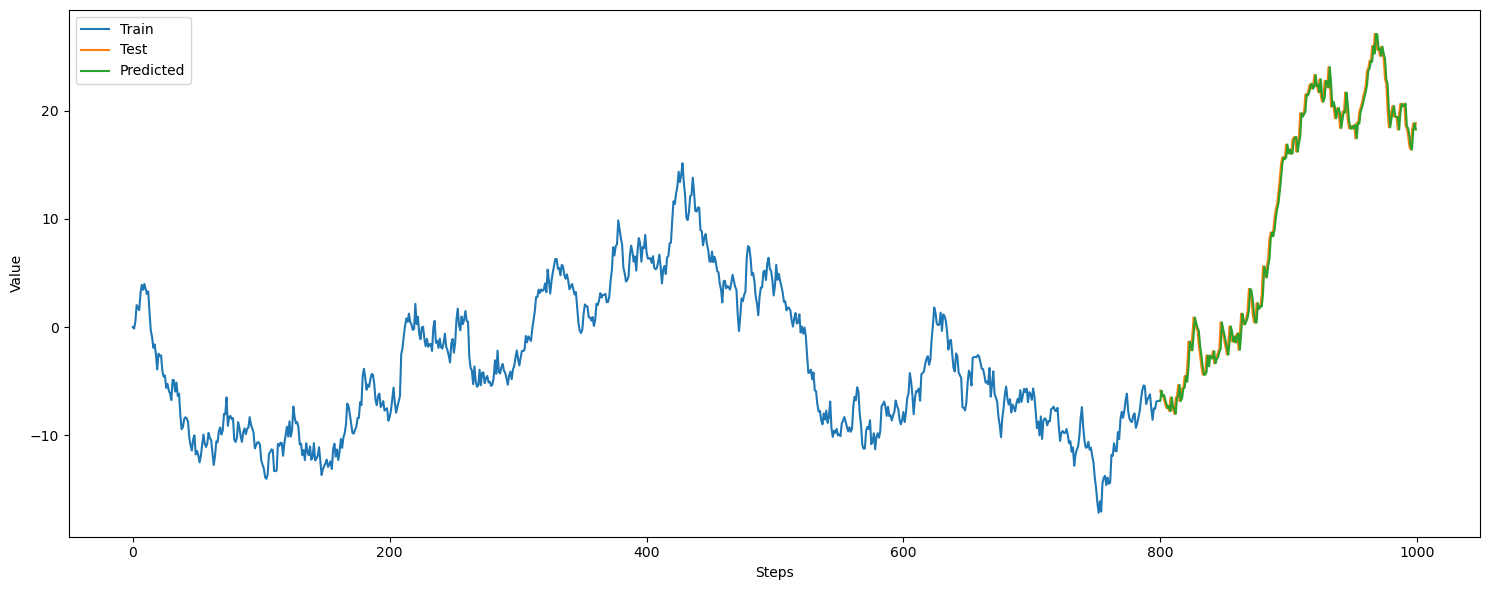

In [42]:
# plotting
plt.figure(figsize=(15, 6))
sns.lineplot(data=train_rw, x=train_rw.index, y='value', label='Train')
sns.lineplot(data=test_rw, x=test_rw.index, y='value', label='Test')
sns.lineplot(data=test_rw, x=test_rw.index, y='predicted', label='Predicted')

plt.xlabel('Steps')
plt.ylabel('Value')
plt.tight_layout()

In [43]:
# forecasting a stationary process with autocorrelation

In [44]:
# moving average process, MA(q)
# in a moving average process, the current value depends on the mean of the series
# the current error and the past error
# yt = u + et
# q denotes the number of past error terms the present value depend on
# how do we identify q?

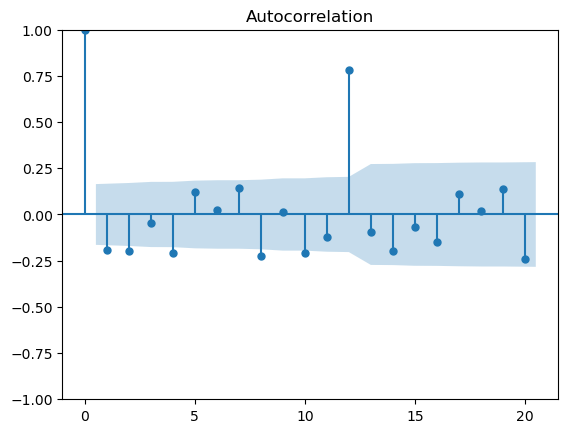

In [45]:
plot_acf(df_transformed, lags=20);

In [46]:
# q is the lag with highest autocorrelation after which no significant correlation occures
# from graph, q = 12

In [47]:
#importing moving average
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)       
        
MA_model = SARIMAX(train['passengers'], order=(0,0,12), simple_differencing=False) # q=12
MA_model_fit = MA_model.fit(disp=False)

MA_pred = MA_model_fit.get_prediction(132, 143).predicted_mean
MA_pred

132    401.545209
133    335.029274
134    396.805754
135    325.390315
136    307.049039
137    367.130928
138    306.057789
139    246.733414
140    153.085183
141    107.944453
142    112.522554
143     43.128188
Name: predicted_mean, dtype: float64

In [48]:
# how does this look on the actual data
# to inverse tranform (from differenced to original) is to find the cumulative sum
# y1' = y1 - y0
# y1 = y1' + y0 = y1 - y0 + y0 = y1
# y2 = y2' + y1' + y0

In [49]:
test.loc[:, 'predicted(MA)'] = MA_pred

In [50]:
test

,date,passengers,baseline,predicted(MA)
132,1960-01-31,417,360,401.545209
133,1960-02-29,391,342,335.029274
134,1960-03-31,419,406,396.805754
135,1960-04-30,461,396,325.390315
136,1960-05-31,472,420,307.049039
137,1960-06-30,535,472,367.130928
138,1960-07-31,622,548,306.057789
139,1960-08-31,606,559,246.733414
140,1960-09-30,508,463,153.085183
141,1960-10-31,461,407,107.944453


In [51]:
mape_ma = mape(test['passengers'], test['predicted(MA)'])
mape_ma

44.72941366683134

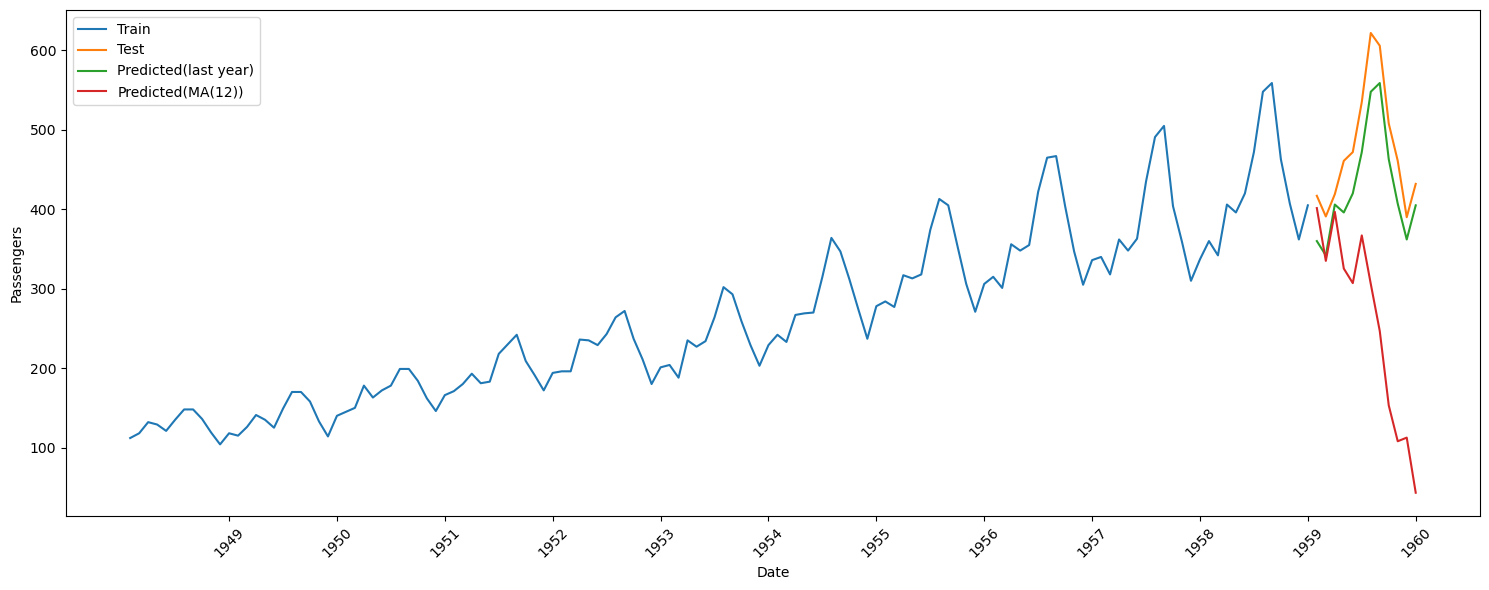

In [52]:
# plotting
plt.figure(figsize=(15, 6))
sns.lineplot(data=train, x='date', y='passengers', label='Train')
sns.lineplot(data=test, x='date', y='passengers', label='Test')
sns.lineplot(data=test, x='date', y='baseline', label='Predicted(last year)')
sns.lineplot(data=test, x='date', y='predicted(MA)', label='Predicted(MA(12))')


years = pd.to_datetime(df['date']).dt.year.unique()
ticks = [f"{year}-12-31" for year in years]
plt.xticks(ticks=ticks, labels=years, rotation=45)

plt.xlabel('Date')
plt.ylabel('Passengers')
plt.tight_layout()

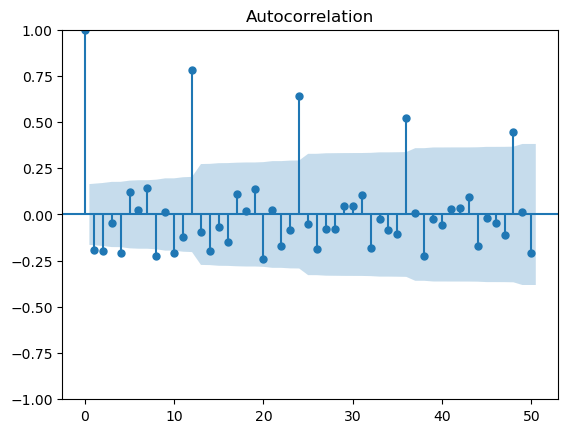

In [53]:
# increasing the lag, we see that our process is not a moving average one
# as the correlation decrease with step

plot_acf(df_transformed, lags=50);

In [54]:
# autoregressive process, AR(p)
# a process in the present value is linearly dependent of its past values
# p is the order of the process

# p can be identified from a Partical AutoCorrelation Function, PACF

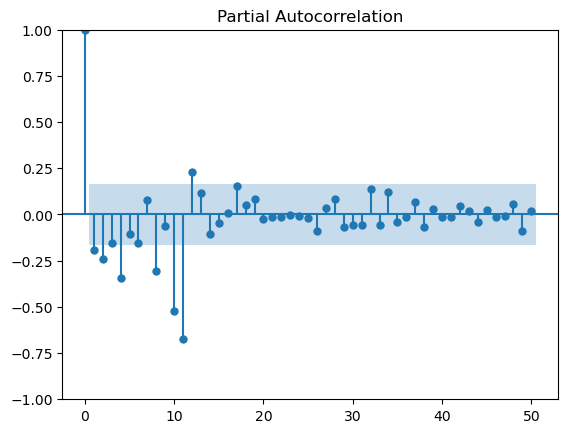

In [55]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df_transformed, lags=50);

In [56]:
# from the plot, p=12
# after lag 12, no significant correlation occurs

In [57]:
AR_model = SARIMAX(train['passengers'], order=(12,0,0), simple_differencing=False) # p=12
AR_model_fit = AR_model.fit(disp=False)

AR_pred = AR_model_fit.get_prediction(132, 143).predicted_mean
AR_pred
        

132    400.094683
133    387.489202
134    400.682568
135    374.254367
136    413.598470
137    456.614284
138    526.337496
139    522.140662
140    468.225367
141    424.806083
142    388.835886
143    418.037291
Name: predicted_mean, dtype: float64

In [58]:
test.loc[:, 'predicted(AR)'] = AR_pred

In [59]:
test

,date,passengers,baseline,predicted(MA),predicted(AR)
132,1960-01-31,417,360,401.545209,400.094683
133,1960-02-29,391,342,335.029274,387.489202
134,1960-03-31,419,406,396.805754,400.682568
135,1960-04-30,461,396,325.390315,374.254367
136,1960-05-31,472,420,307.049039,413.598470
137,1960-06-30,535,472,367.130928,456.614284
138,1960-07-31,622,548,306.057789,526.337496
139,1960-08-31,606,559,246.733414,522.140662
140,1960-09-30,508,463,153.085183,468.225367
141,1960-10-31,461,407,107.944453,424.806083


In [60]:
mape_ar = mape(test['passengers'], test['predicted(AR)'])
mape_ar

8.632886970629858

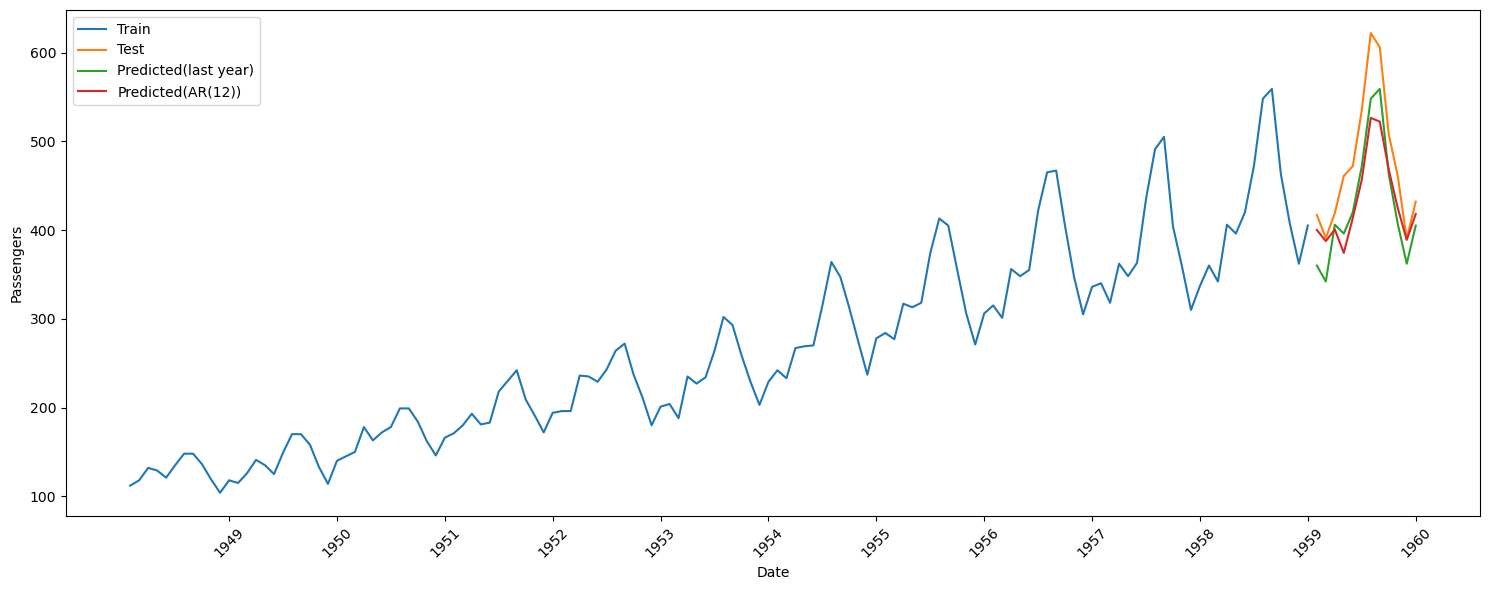

In [61]:
# plotting
plt.figure(figsize=(15, 6))
sns.lineplot(data=train, x='date', y='passengers', label='Train')
sns.lineplot(data=test, x='date', y='passengers', label='Test')
sns.lineplot(data=test, x='date', y='baseline', label='Predicted(last year)')
# sns.lineplot(data=test, x='date', y='predicted(MA)', label='Predicted(MA(12))')
sns.lineplot(data=test, x='date', y='predicted(AR)', label='Predicted(AR(12))')

years = pd.to_datetime(df['date']).dt.year.unique()
ticks = [f"{year}-12-31" for year in years]
plt.xticks(ticks=ticks, labels=years, rotation=45)

plt.xlabel('Date')
plt.ylabel('Passengers')
plt.tight_layout()

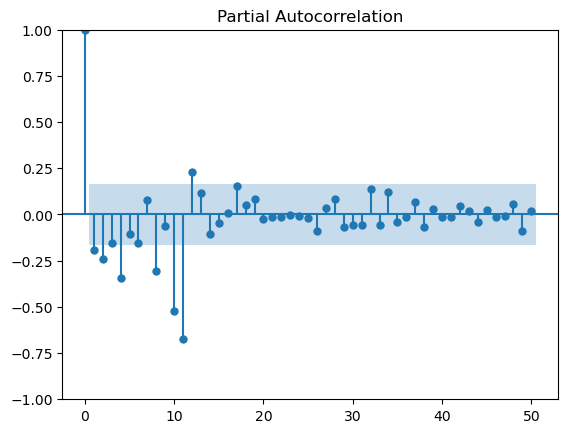

In [62]:
# due to the sinosoidal effect in the graph, an appropraite p cannot be determined
plot_pacf(df_transformed, lags=50);

In [63]:
# could it be that we not selecing the right p and q?
# we can use AIC (Akaike Information Criterion) 
# which measures the quality of a model in relation to other models
# we will use AIC on ARMA, combination fo AR and MA
# to find the optimum combinatinon of p and q

In [64]:
# importing libraries
from typing import Union
from tqdm import tqdm_notebook

#optimization function
def optimize_ARMA(series, orders):
    results = []
    for order in tqdm_notebook(orders):
        try: 
            model = SARIMAX(series, order=(order[0], 0, order[1]), simple_differencing=False).fit(disp=False)
        except:
            continue
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, q)', 'AIC']
    
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    return result_df
    

In [65]:
from itertools import product
ps = range(0, 13)
qs = range(0, 13)
orders = list(product(ps, qs))

In [66]:
# result_df = optimize_ARMA(train_trans['passengers'], orders)

In [67]:
# result_df

In [68]:
# the result fo the optimization shows that ARMA(11, 3)

In [69]:
ARMA_model = SARIMAX(train['passengers'], order=(11,0,3), simple_differencing=False) # p=11, q=3
ARMA_model_fit = ARMA_model.fit(disp=False)

ARMA_pred = ARMA_model_fit.get_prediction(132, 143).predicted_mean
ARMA_pred

132    401.404932
133    383.018871
134    409.513767
135    388.466278
136    414.794364
137    447.774947
138    530.892501
139    536.865385
140    466.274114
141    421.157382
142    382.854298
143    426.888747
Name: predicted_mean, dtype: float64

In [70]:
test.loc[:, 'predicted(ARMA)'] = ARMA_pred
test

,date,passengers,baseline,predicted(MA),predicted(AR),predicted(ARMA)
132,1960-01-31,417,360,401.545209,400.094683,401.404932
133,1960-02-29,391,342,335.029274,387.489202,383.018871
134,1960-03-31,419,406,396.805754,400.682568,409.513767
135,1960-04-30,461,396,325.390315,374.254367,388.466278
136,1960-05-31,472,420,307.049039,413.598470,414.794364
137,1960-06-30,535,472,367.130928,456.614284,447.774947
138,1960-07-31,622,548,306.057789,526.337496,530.892501
139,1960-08-31,606,559,246.733414,522.140662,536.865385
140,1960-09-30,508,463,153.085183,468.225367,466.274114
141,1960-10-31,461,407,107.944453,424.806083,421.157382


In [71]:
mape_arma = mape(test['passengers'], test['predicted(ARMA)'])
mape_arma

8.177524416299214

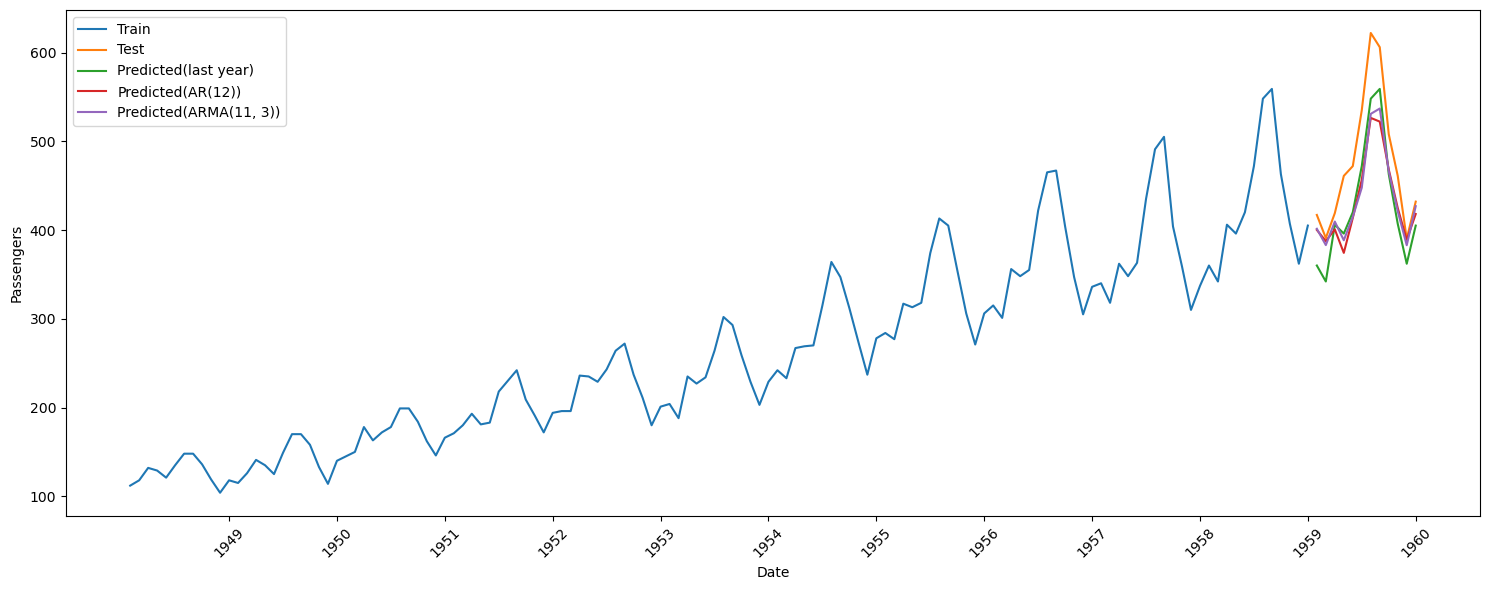

In [72]:
# plotting
plt.figure(figsize=(15, 6))
sns.lineplot(data=train, x='date', y='passengers', label='Train')
sns.lineplot(data=test, x='date', y='passengers', label='Test')
sns.lineplot(data=test, x='date', y='baseline', label='Predicted(last year)')
# sns.lineplot(data=test, x='date', y='predicted(MA)', label='Predicted(MA(12))')
sns.lineplot(data=test, x='date', y='predicted(AR)', label='Predicted(AR(12))')
sns.lineplot(data=test, x='date', y='predicted(ARMA)', label='Predicted(ARMA(11, 3))')

years = pd.to_datetime(df['date']).dt.year.unique()
ticks = [f"{year}-12-31" for year in years]
plt.xticks(ticks=ticks, labels=years, rotation=45)

plt.xlabel('Date')
plt.ylabel('Passengers')
plt.tight_layout()

In [73]:
# as confirmed by the above plot, the series is not an ARMA process

In [74]:
# ARIMA (p,d,q) , Autoregressive Integrated Moving Average
# d is the order o integration
# d is the number of times a series has beeng difference to stationarity
# d = 2

In [75]:
# result_df = optimize_ARMA(train_trans['passengers'], orders)

In [76]:
# result_df

In [77]:
# the best model is ARIMA(11, 2, 3)

In [78]:
# running arima model
ARIMA_model = SARIMAX(train['passengers'], order=(11,2,3), simple_differencing=False)
ARIMA_model_fit = ARIMA_model.fit(disp=False)

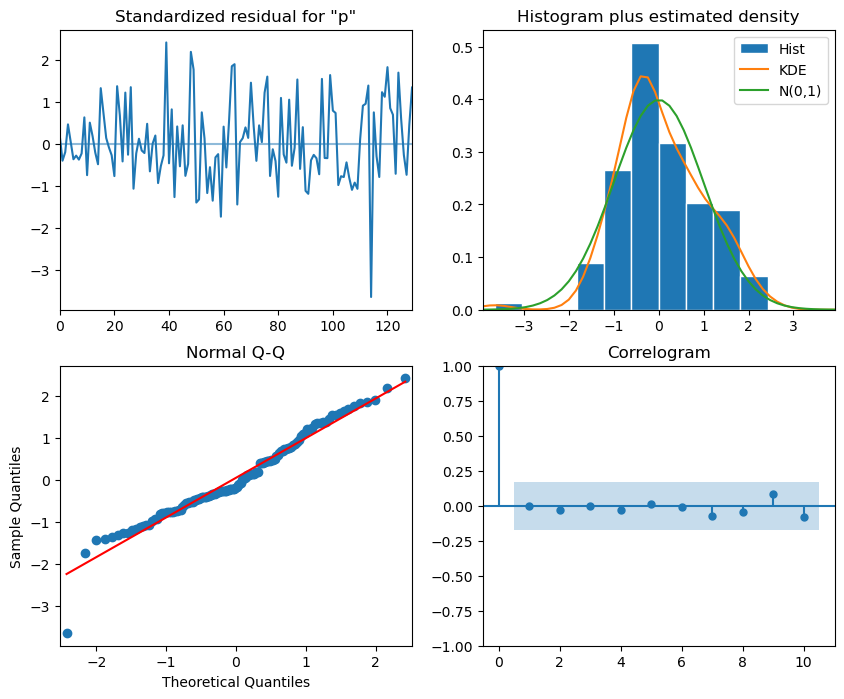

In [79]:
# advanced visualisation
ARIMA_model_fit.plot_diagnostics(figsize=(10,8));

In [80]:
# The top-right plot shows the distribution of the residuals, 
# which approaches a normal distribution, despite the unusual peak. 
# This is further confirmed by the Q-Q plot at the bottom left, 
# which displays a fairly straight line that lies on y = x. Finally, 
# the correlogram in the bottom-right plot shows no significant autocorrelation coefficients after lag 0, 
# which is exactly like white noise. From this analysis, the residuals resemble white noise.

In [81]:
# to furthur test the hypothesis (residuals is white noise)
# run pvalue for first 10 lags

from statsmodels.stats.diagnostic import acorr_ljungbox
residuals = ARIMA_model_fit.resid
acorr_ljungbox(residuals, np.arange(1, 11, 1)) 

,lb_stat,lb_pvalue
1,6.539804,0.010549
2,6.668586,0.035640
3,6.944532,0.073687
4,7.737439,0.101684
5,8.378754,0.136560
6,8.669689,0.193024
7,9.493161,0.219160
8,9.731240,0.284398
9,9.741705,0.371798
10,11.546388,0.316561


In [82]:
# hypothesis is only true after lag 2

In [83]:
ARIMA_pred = ARIMA_model_fit.get_prediction(132, 143).predicted_mean
ARIMA_pred

132    422.425129
133    410.709813
134    461.929641
135    457.888969
136    481.784391
137    531.226824
138    606.186924
139    615.420095
140    525.456218
141    467.065141
142    425.076203
143    467.359251
Name: predicted_mean, dtype: float64

In [84]:
test.loc[:, 'predicted(ARIMA)'] = ARIMA_pred
test

,date,passengers,baseline,predicted(MA),predicted(AR),predicted(ARMA),predicted(ARIMA)
132,1960-01-31,417,360,401.545209,400.094683,401.404932,422.425129
133,1960-02-29,391,342,335.029274,387.489202,383.018871,410.709813
134,1960-03-31,419,406,396.805754,400.682568,409.513767,461.929641
135,1960-04-30,461,396,325.390315,374.254367,388.466278,457.888969
136,1960-05-31,472,420,307.049039,413.598470,414.794364,481.784391
137,1960-06-30,535,472,367.130928,456.614284,447.774947,531.226824
138,1960-07-31,622,548,306.057789,526.337496,530.892501,606.186924
139,1960-08-31,606,559,246.733414,522.140662,536.865385,615.420095
140,1960-09-30,508,463,153.085183,468.225367,466.274114,525.456218
141,1960-10-31,461,407,107.944453,424.806083,421.157382,467.065141


In [85]:
mape_arima = mape(test['passengers'], test['predicted(ARIMA)'])
mape_arima

3.839022024196686

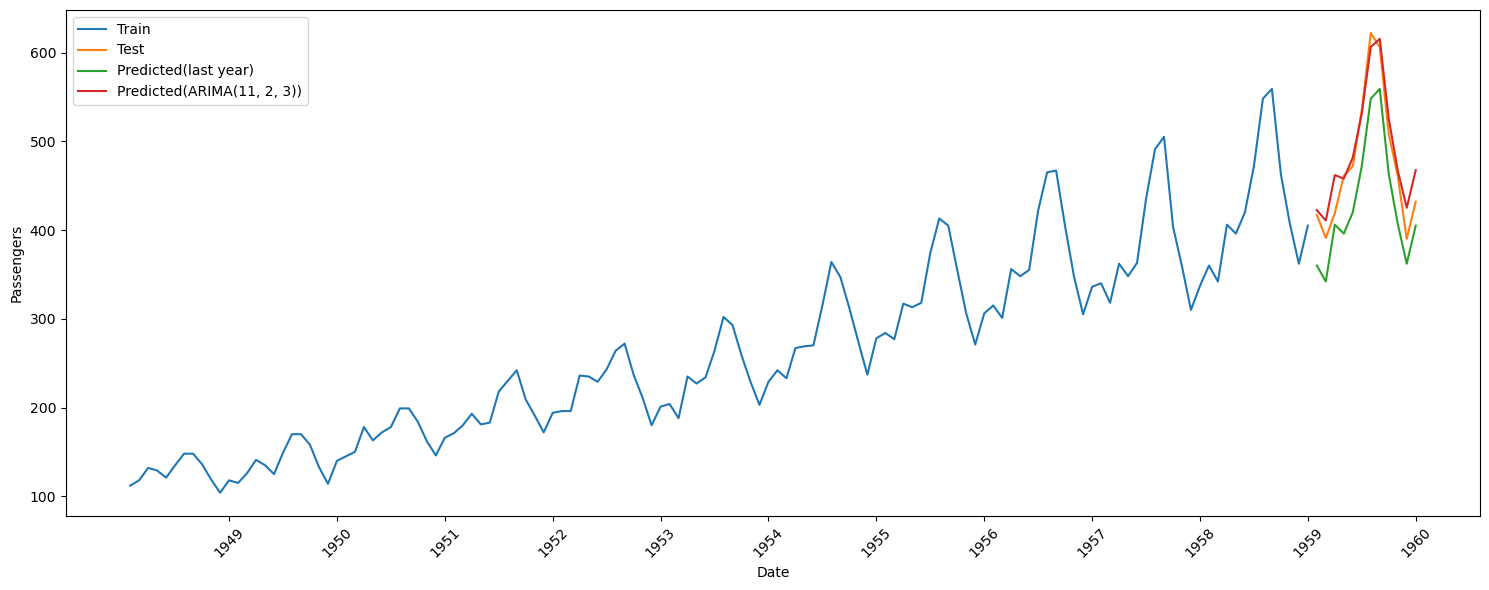

In [86]:
# plotting
plt.figure(figsize=(15, 6))
sns.lineplot(data=train, x='date', y='passengers', label='Train')
sns.lineplot(data=test, x='date', y='passengers', label='Test')
sns.lineplot(data=test, x='date', y='baseline', label='Predicted(last year)')
# sns.lineplot(data=test, x='date', y='predicted(MA)', label='Predicted(MA(12))')
# sns.lineplot(data=test, x='date', y='predicted(AR)', label='Predicted(AR(12))')
# sns.lineplot(data=test, x='date', y='predicted(ARMA)', label='Predicted(ARMA(11, 3))')
sns.lineplot(data=test, x='date', y='predicted(ARIMA)', label='Predicted(ARIMA(11, 2, 3))')


years = pd.to_datetime(df['date']).dt.year.unique()
ticks = [f"{year}-12-31" for year in years]
plt.xticks(ticks=ticks, labels=years, rotation=45)

plt.xlabel('Date')
plt.ylabel('Passengers')
plt.tight_layout()

In [87]:
# Accounting for seasonality

In [88]:
# SARIMA (Seasonal AutoRegressive Integreated Moving Average)
# SARIMA adds seasonality to ARIMA
# Seasonality are the periodic patterns in a process

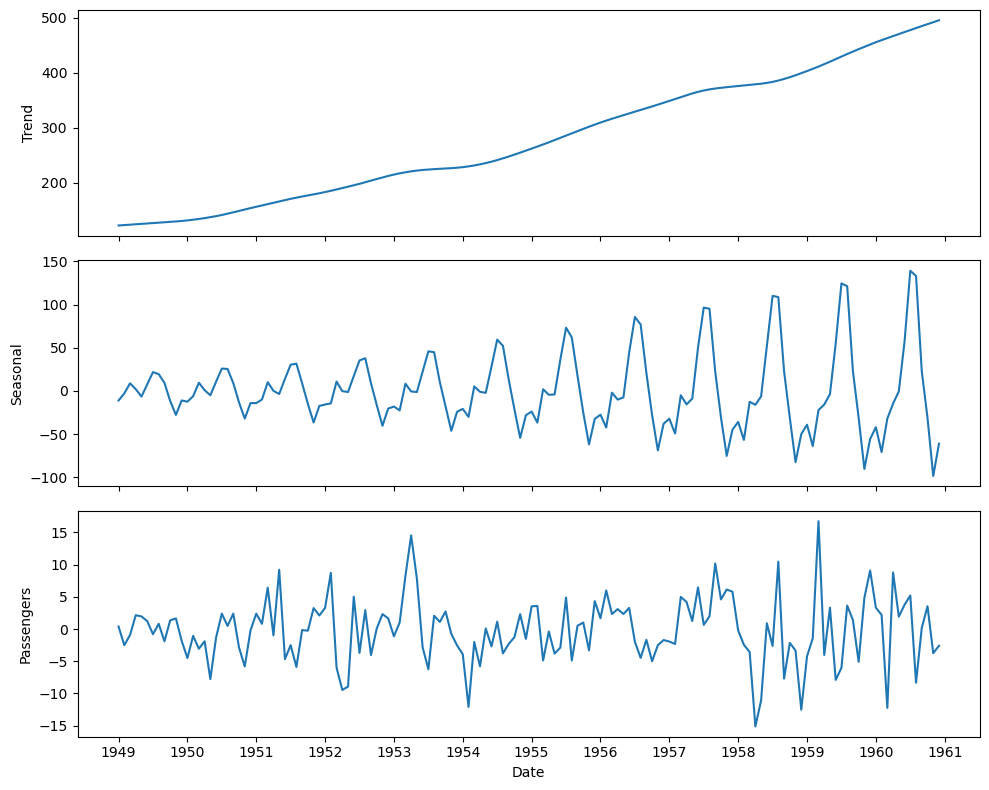

In [89]:
# A time seiers = trend + seasonality + residuals

# plotting the components
from statsmodels.tsa.seasonal import STL

decomposition = STL(df['passengers'], period=12).fit() # as or data a cycle of 12
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(10,8))

ax1.plot(decomposition.trend)
ax1.set_ylabel('Trend')
ax2.plot(decomposition.seasonal)
ax2.set_ylabel('Seasonal')
ax3.plot(decomposition.resid)
ax3.set_ylabel('Residuals') 

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.tight_layout()

In [90]:
# SARIMA(p, d, q)(P, Q, D)m
# where m is the number of observations per cycle
# P is order of Seasonal AR(P)
# Q is order of Seasonal MA(Q)
# D is order of Seasonal ARIMA(P, D, Q)

In [91]:
df_diff2 = np.diff(df['passengers'], n=1)
adfuller(df_diff2)[1] # not stationary, d=1

0.054213290283825294

In [92]:
# due to seasonality, differencing must be done with seasonality considered
df_diff2_season = np.diff(df_diff2, n=12) # seasonality of 12
adfuller(df_diff2_season)[1] # stationary, D=1, one cycle

3.8230468557576776e-30

In [93]:
#optimization function
def optimize_SARIMA(series, orders, d, D, s): # s=m
    results = []
    for order in tqdm_notebook(orders):
        try: 
            model = SARIMAX(series, order=(order[0], d, order[1]), seasonal_order=(order[2], D, order[3], s), simple_differencing=False).fit(disp=False)
        except:
            continue
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, q, P, Q)', 'AIC']
    
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    return result_df
    

In [94]:
ps = range(0, 4)
qs = range(0, 4)
Ps = range(0, 4)
Qs = range(0, 4)
d = 1
D = 1
s = 12
orders = list(product(ps, qs, Ps, Qs))

In [95]:
# result_df = optimize_SARIMA(train['passengers'], orders, d, D, s)

In [96]:
# result_df

In [97]:
# the best model is SARIMA(1, 1, 2)(1, 1, 0, 12)

In [98]:
SARIMA_model = SARIMAX(train['passengers'], order=(11,2,3), seasonal_order=(1, 1, 2, 12), simple_differencing=False)
SARIMA_model_fit = SARIMA_model.fit(disp=False)

SARIMA_pred = SARIMA_model_fit.get_prediction(132, 143).predicted_mean
SARIMA_pred

132    414.925310
133    399.534966
134    458.381831
135    447.429593
136    471.469725
137    533.257238
138    612.352213
139    625.219643
140    523.110241
141    462.075862
142    408.694634
143    452.059924
Name: predicted_mean, dtype: float64

In [99]:
test.loc[:, 'predicted(SARIMA)'] = SARIMA_pred
test

,date,passengers,baseline,predicted(MA),predicted(AR),predicted(ARMA),predicted(ARIMA),predicted(SARIMA)
132,1960-01-31,417,360,401.545209,400.094683,401.404932,422.425129,414.925310
133,1960-02-29,391,342,335.029274,387.489202,383.018871,410.709813,399.534966
134,1960-03-31,419,406,396.805754,400.682568,409.513767,461.929641,458.381831
135,1960-04-30,461,396,325.390315,374.254367,388.466278,457.888969,447.429593
136,1960-05-31,472,420,307.049039,413.598470,414.794364,481.784391,471.469725
137,1960-06-30,535,472,367.130928,456.614284,447.774947,531.226824,533.257238
138,1960-07-31,622,548,306.057789,526.337496,530.892501,606.186924,612.352213
139,1960-08-31,606,559,246.733414,522.140662,536.865385,615.420095,625.219643
140,1960-09-30,508,463,153.085183,468.225367,466.274114,525.456218,523.110241
141,1960-10-31,461,407,107.944453,424.806083,421.157382,467.065141,462.075862


In [100]:
mape_sarima = mape(test['passengers'], test['predicted(SARIMA)'])
mape_sarima

2.735721085898329

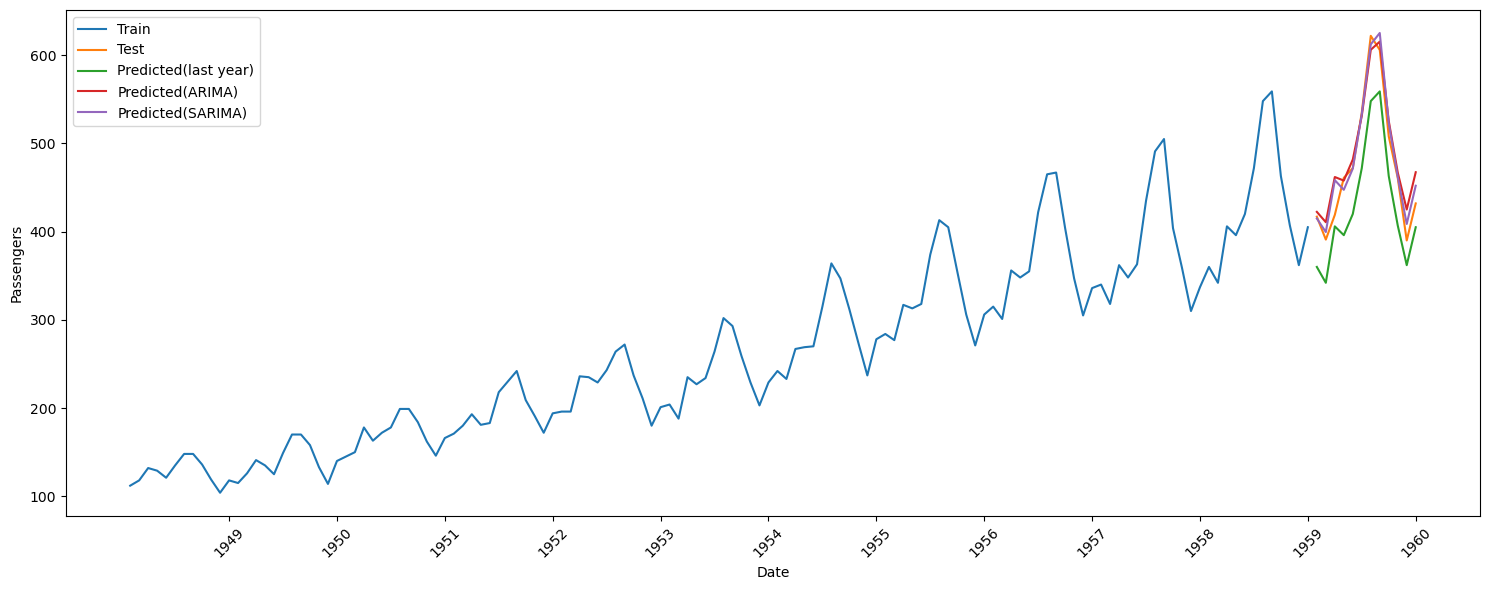

In [101]:
# plotting
plt.figure(figsize=(15, 6))
sns.lineplot(data=train, x='date', y='passengers', label='Train')
sns.lineplot(data=test, x='date', y='passengers', label='Test')
sns.lineplot(data=test, x='date', y='baseline', label='Predicted(last year)')
# sns.lineplot(data=test, x='date', y='predicted(MA)', label='Predicted(MA(12))')
# sns.lineplot(data=test, x='date', y='predicted(AR)', label='Predicted(AR(12))')
# sns.lineplot(data=test, x='date', y='predicted(ARMA)', label='Predicted(ARMA(11, 3))')
sns.lineplot(data=test, x='date', y='predicted(ARIMA)', label='Predicted(ARIMA)')
sns.lineplot(data=test, x='date', y='predicted(SARIMA)', label='Predicted(SARIMA)')

years = pd.to_datetime(df['date']).dt.year.unique()
ticks = [f"{year}-12-31" for year in years]
plt.xticks(ticks=ticks, labels=years, rotation=45)

plt.xlabel('Date')
plt.ylabel('Passengers')
plt.tight_layout()

In [126]:
metrics = pd.DataFrame({
    'metric': [mape_ma, mape_ar, mape_arma, mape_arima, mape_sarima],
    'model': ['MA', 'AR', 'ARMA', 'ARIMA', 'SARIMA']
})

metrics['metric'] = round(metrics['metric'], 2)


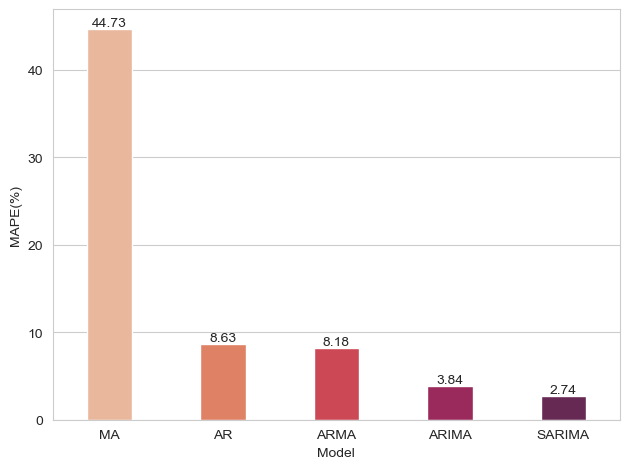

In [139]:
sns.set_palette("rocket_r")
sns.set_style('whitegrid')
ax = sns.barplot(metrics, x='model', y='metric', width=0.4)
ax.bar_label(ax.containers[0], fontsize=10);
plt.ylabel('MAPE(%)')
plt.xlabel('Model')
plt.tight_layout()